In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
Followed by the data exploration

In [2]:
data = pd.read_csv('diabetes.csv')
print(data.shape)

(768, 9)


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Notes on the data
- There are some features with zero values that are not possible (e.g. BMI, blood pressure, etc.)
- 35% out of the 768 patients have diabetes
- The data is not normalized

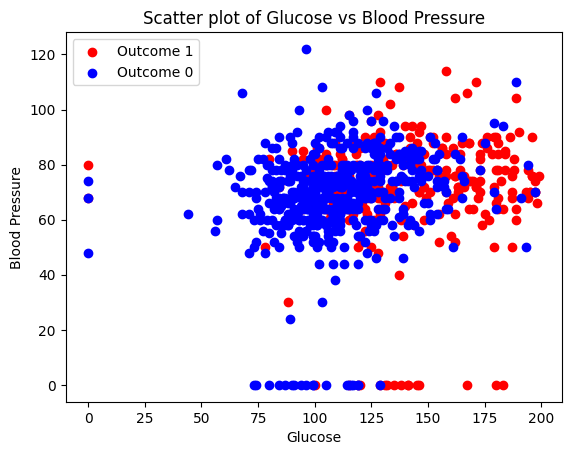

In [5]:
plt.figure()

plt.scatter(data[data['Outcome'] == 1]['Glucose'], data[data['Outcome'] == 1]['BloodPressure'],
            color='red', label='Outcome 1')

plt.scatter(data[data['Outcome'] == 0]['Glucose'], data[data['Outcome'] == 0]['BloodPressure'],
            color='blue', label='Outcome 0')

plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Scatter plot of Glucose vs Blood Pressure')
plt.legend()

plt.show()


# Creating a first simple Model
Here we will create a simple model using a Decision Tree Classifier
With no preprocessing of the data, no feature selection, etc.
Also not setting a max_depth for the tree, so it will overfit the data

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.649


# Limiting the Depth of the Model
experimentation with different depths

In [7]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.782
Accuracy on test set: 0.695


In [8]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.796
Accuracy on test set: 0.701


In [9]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.805
Accuracy on test set: 0.682


The Accuracy on the test set is the same at 2 and 3, starts to decrease at 4.
To keep it simple, lets keep the depth at 2

In [10]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.782
Accuracy on test set: 0.695


In [11]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
                feature_names=data.columns[:-1], impurity=False, filled=True)

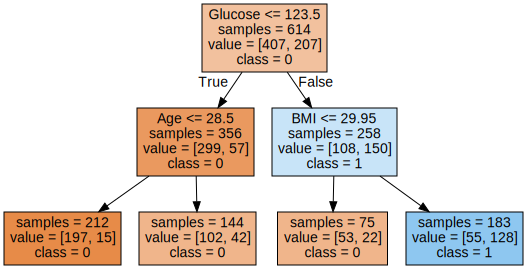

In [12]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

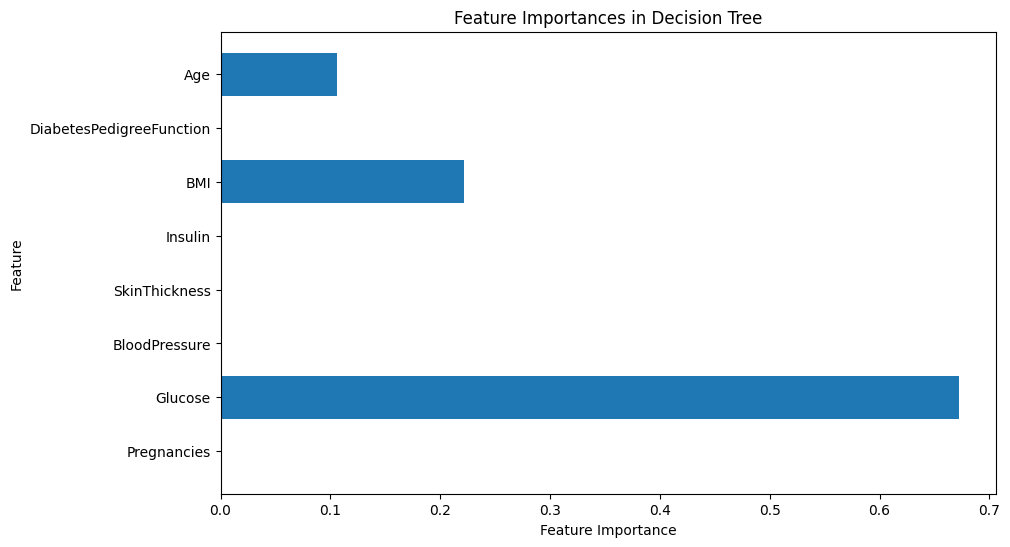

Feature: Pregnancies, Importance: 0.000
Feature: Glucose, Importance: 0.672
Feature: BloodPressure, Importance: 0.000
Feature: SkinThickness, Importance: 0.000
Feature: Insulin, Importance: 0.000
Feature: BMI, Importance: 0.222
Feature: DiabetesPedigreeFunction, Importance: 0.000
Feature: Age, Importance: 0.106


In [13]:
feature_importances = tree.feature_importances_

feature_names = X_train.columns

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.show()

# Print feature importances
for feature, importance in zip(feature_names, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.3f}")


# Conclusion from feature importances
Only Glucose, BMI and Age are used in the decision tree
So Lets drop the other features and retrain the model

In [14]:
data = pd.read_csv('diabetes.csv')
data.drop(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis=1, inplace=True)
data.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.762
Accuracy on test set: 0.727


Using an even simpler Tree Model is beneficial

To go further, lets try to remove the zero values from the data

In [16]:
original_row_count = data.shape[0]

# Drop rows where either BMI or Glucose is 0
data_cleaned = data[(data['BMI'] != 0) & (data['Glucose'] != 0)]

cleaned_row_count = data_cleaned.shape[0]

print(f"Number of rows before dropping: {original_row_count}")
print(f"Number of rows after dropping: {cleaned_row_count}")
print(f"Removed rows: {original_row_count - cleaned_row_count}")


Number of rows before dropping: 768
Number of rows after dropping: 752
Removed rows: 16


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2)
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.749
Accuracy on test set: 0.766


# Conclusion
The accuracy is the same, but the model should be more robust now

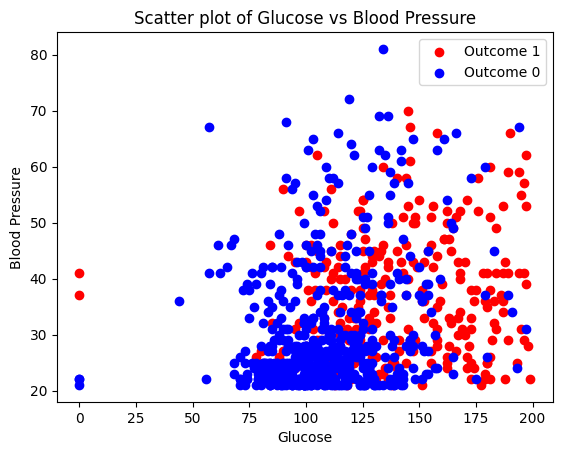

In [18]:
plt.figure()

plt.scatter(data[data['Outcome'] == 1]['Glucose'], data[data['Outcome'] == 1]['Age'],
            color='red', label='Outcome 1')

plt.scatter(data[data['Outcome'] == 0]['Glucose'], data[data['Outcome'] == 0]['Age'],
            color='blue', label='Outcome 0')

plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Scatter plot of Glucose vs Blood Pressure')
plt.legend()

plt.show()

In [19]:
from sklearn.utils import resample

# Separate the data into two groups based on the outcome
data_0 = data[data['Outcome'] == 0]
data_1 = data[data['Outcome'] == 1]

# Determine the size of the smaller group
size = min(len(data_0), len(data_1))

# Randomly sample the larger group to match the size of the smaller group
data_0_downsampled = resample(data_0, replace=False, n_samples=size, random_state=42)
data_1_downsampled = resample(data_1, replace=False, n_samples=size, random_state=42)

# Combine the sampled data to create a balanced dataset
data_balanced = pd.concat([data_0_downsampled, data_1_downsampled])

# Shuffle the data to mix the outcome classes
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the number of rows in the balanced dataset
balanced_row_count = data_balanced.shape[0]
print(f"Number of rows in the balanced dataset: {balanced_row_count}")

# Check the outcome distribution in the balanced dataset
print(data_balanced['Outcome'].value_counts())


Number of rows in the balanced dataset: 536
Outcome
0    268
1    268
Name: count, dtype: int64


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_balanced.drop('Outcome', axis=1), data_balanced['Outcome'], test_size=0.2)
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

from sklearn.metrics import classification_report

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, tree.predict(X_test)))

Accuracy on training set: 0.813
Accuracy on test set: 0.731
              precision    recall  f1-score   support

           0       0.79      0.62      0.69        53
           1       0.70      0.84      0.76        55

    accuracy                           0.73       108
   macro avg       0.74      0.73      0.73       108
weighted avg       0.74      0.73      0.73       108

